<a href="https://colab.research.google.com/github/shudanluo/Data-Science-For-Beginners/blob/main/Crop_Recommendatio02_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
The objective of this project is to provide actionable insights into optimal crop selection by analyzing environmental and soil factors. This will involve an exploration of how various crops respond to specific conditions, such as soil nutrient content, climatic factors like temperature and humidity, and rainfall patterns.

# Tasks
Create Data Visualizations:

Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.
Generate scatter plots to visualize the relationship between temperature, humidity, pH, and rainfall with crop type to detect dependencies.
Craft heatmaps to show correlations between all numerical factors, helping to pinpoint interdependencies.
Perform Statistical Analysis:

Execute ANOVA tests to examine whether means of different environmental factors (like humidity, temperature, and rainfall) are significantly different across various crop types.
Use regression models to assess the influence of environmental and soil factors on crop yield and type.
Interpret the p-values from your statistical tests to determine significance levels, and use this to draw conclusions about the factors that are most predictive of crop type.

In [2]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define file path (adjust if it's in a folder)
file_path = '/content/drive/MyDrive/Crop_recommendation.csv'

# Step 3: Load CSV into DataFrame
df = pd.read_csv(file_path)

# Step 4: Preview the first 5 rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# High level EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Basic info
print("🔹 Dataset shape:", df.shape)
print("\n🔹 Column names:", df.columns.tolist())
print("\n🔹 Data types:\n", df.dtypes)
print("\n🔹 Missing values:\n", df.isnull().sum())

🔹 Dataset shape: (2200, 8)

🔹 Column names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

🔹 Data types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

🔹 Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# Descriptive statistics
print("\n🔹 Summary statistics:\n")
display(df.describe())


🔹 Summary statistics:



,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Unique crops and sample counts
print("\n🔹 Number of unique crops:", df['label'].nunique())
print("🔹 Crop distribution:\n")
print(df['label'].value_counts())


🔹 Number of unique crops: 22
🔹 Crop distribution:

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


# Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create figure
plt.figure(figsize=(14, 4))

<Figure size 1400x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

Text(0, 0.5, 'Frequency')

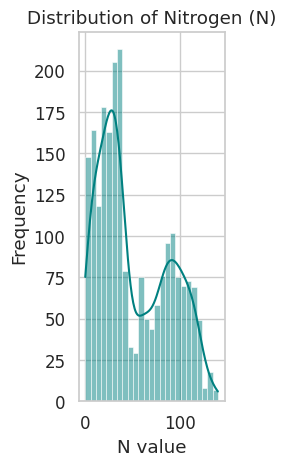

In [11]:
# ---- Nitrogen (N) 氮----
plt.subplot(1, 3, 1)
sns.histplot(df['N'], kde=True, color='teal', bins=25)
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('N value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

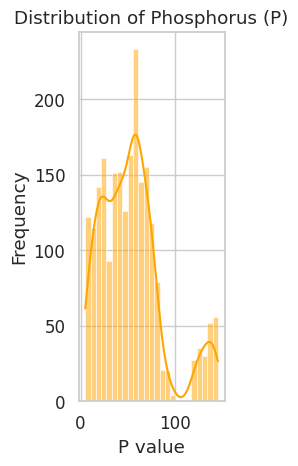

In [12]:
# ---- Phosphorus (P)磷----
plt.subplot(1, 3, 2)
sns.histplot(df['P'], kde=True, color='orange', bins=25)
plt.title('Distribution of Phosphorus (P)')
plt.xlabel('P value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

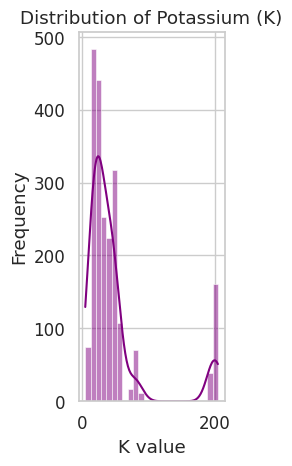

In [13]:
# ---- Potassium (K) ----
plt.subplot(1, 3, 3)
sns.histplot(df['K'], kde=True, color='purple', bins=25)
plt.title('Distribution of Potassium (K)')
plt.xlabel('K value')
plt.ylabel('Frequency')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

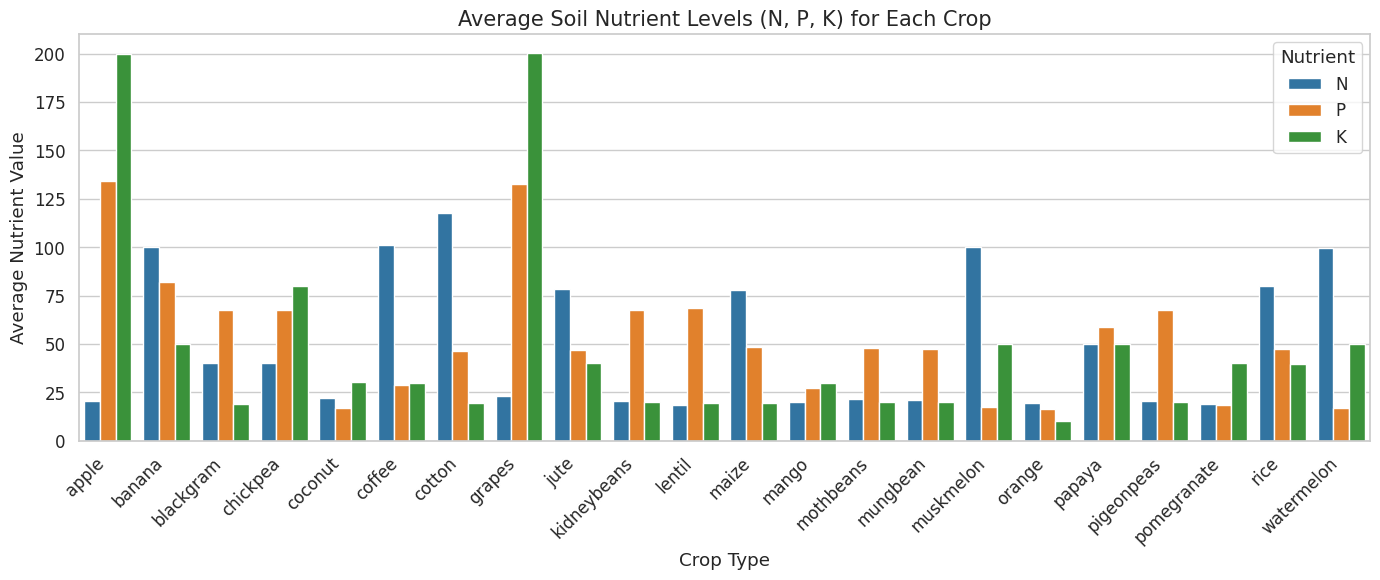

In [15]:
# Step 1: Calculate the average N, P, K for each crop
mean_nutrients = df.groupby('label')[['N', 'P', 'K']].mean().reset_index()

# Step 2: Convert to long format for Seaborn
mean_nutrients_melted = mean_nutrients.melt(
    id_vars='label',
    value_vars=['N', 'P', 'K'],
    var_name='Nutrient',
    value_name='Average Value'
)

# Step 3: Plot grouped bar chart
plt.figure(figsize=(14,6))
sns.barplot(
    data=mean_nutrients_melted,
    x='label', y='Average Value', hue='Nutrient',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c']
)

plt.title('Average Soil Nutrient Levels (N, P, K) for Each Crop', fontsize=15)
plt.xlabel('Crop Type')
plt.ylabel('Average Nutrient Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()


High K demand (Grapes, Apple, Banana) → these crops depend heavily on potassium for fruit quality.

Low nutrient crops (Mango, Orange, Pomegranate) → potentially more sustainable in nutrient-poor soils.

Nitrogen uniformity → nitrogen alone is not a strong differentiator among crops; P and K are more distinctive.bold text




# Generate scatter plots to visualize the relationship between temperature, humidity, pH, and rainfall with crop type to detect dependencies.

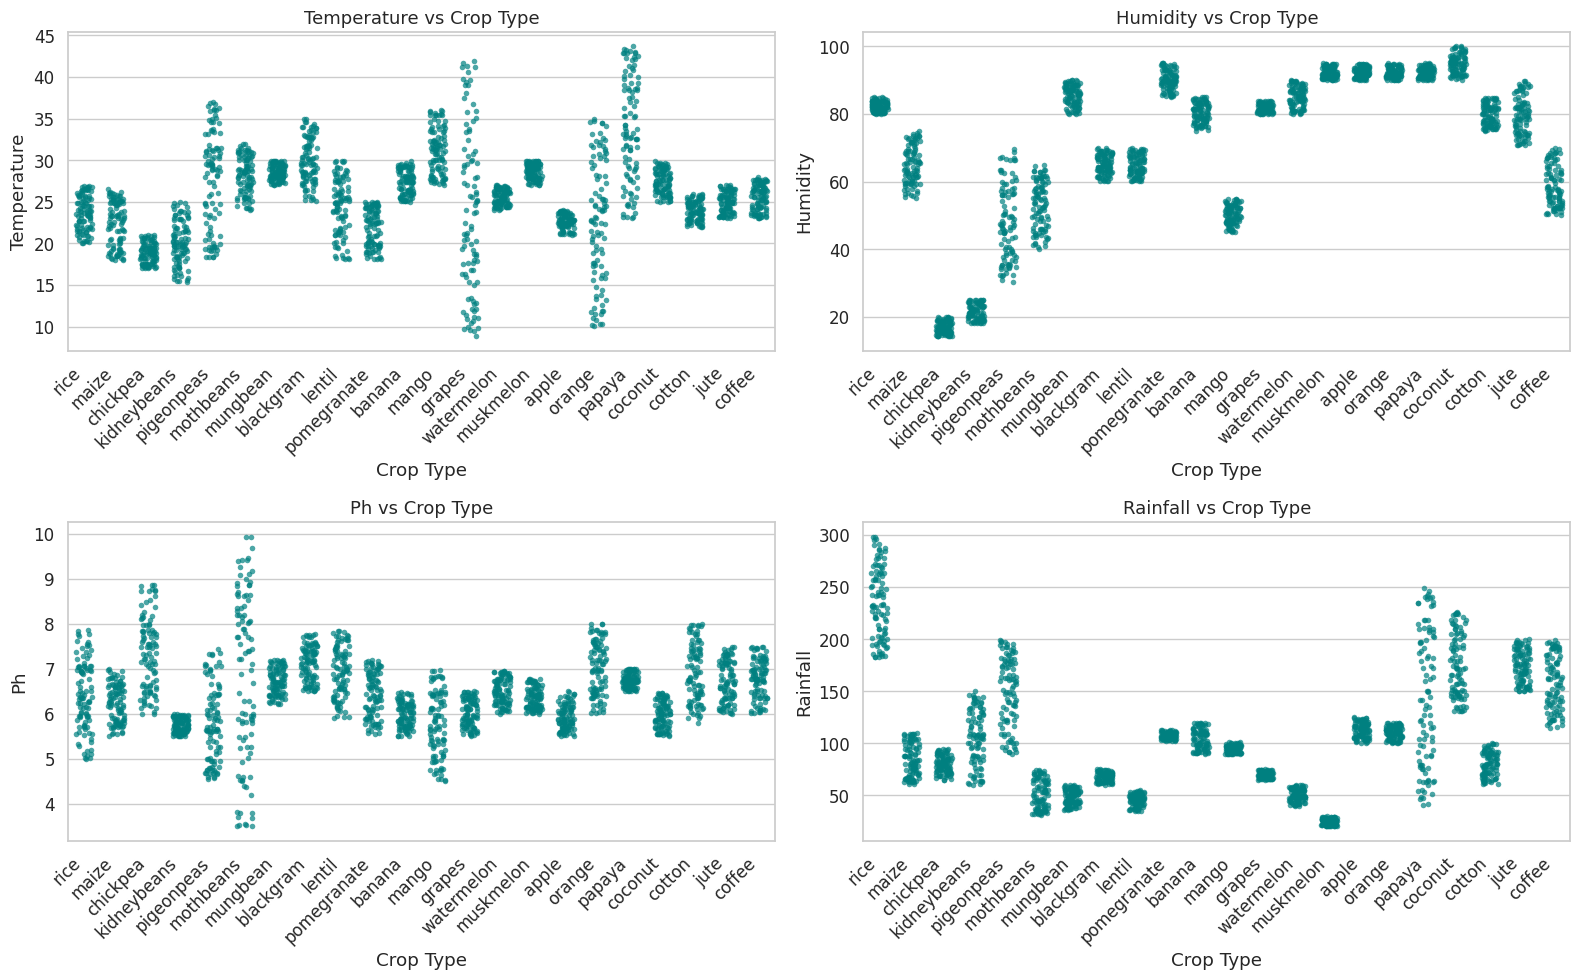

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the factors to visualize
factors = ['temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(16, 10))

for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.stripplot(
        data=df,
        x='label',
        y=factor,
        jitter=0.25,       # small horizontal noise to avoid overlap
        alpha=0.7,         # transparency
        size=4,            # point size
        color='teal'       # color for points
    )
    plt.title(f'{factor.capitalize()} vs Crop Type', fontsize=13)
    plt.xlabel('Crop Type')
    plt.ylabel(factor.capitalize())
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



Temperature vs Crop Type

Most crops grow best between 25°C and 30°C, which appears to be the optimal temperature range.
However, a few crops (such as watermelon, papaya, and pigeon peas) tolerate a much wider range, from as low as 10°C to above 40°C, showing higher adaptability.
In contrast, crops like orange, apple, muskmelon, and mung bean show narrow temperature tolerance, meaning they are more sensitive to temperature variations.

💧 Humidity vs Crop Type

Humidity levels are more concentrated compared to temperature.
Crops like banana, mango, apple, papaya, and coconut require high humidity, while chickpea, kidney beans, and lentil grow in low humidity environments.
This clear separation suggests that humidity is a key environmental factor distinguishing tropical fruits from legumes.

⚗️ pH vs Crop Type

Most crops prefer a neutral pH (6–7), which aligns with typical soil chemistry for agricultural use.
However, mung bean stands out as highly adaptable, tolerating a wide range of pH values, while most others can only tolerate a narrow pH band (around ±1 from their preferred level).
This implies that pH is less discriminative across crops, but still relevant for soil optimization.

🌧 Rainfall vs Crop Type

As expected, rice requires very high rainfall, while legumes (e.g., pigeon peas, chickpeas) thrive under lower rainfall.
Crops like papaya, mango, and banana have moderate to high rainfall requirements, reflecting their tropical origins.
No single rainfall range fits all crops, but 50–100 mm seems suitable for most — though it excludes rain-intensive crops like rice.

🧩 Overall insight

Each crop has a specific environmental profile, with some showing flexibility in one variable but strict limits in others.
For example:

Watermelon is flexible in temperature but strict in rainfall and humidity.

Mung bean is flexible in pH but limited in temperature range.

These patterns suggest potential for clustering crops based on their environmental similarity (temperature, humidity, pH, rainfall).
A next analytical step would be to apply k-means or hierarchical clustering to group crops with similar environmental needs.

,temperature,humidity,ph,rainfall
cluster,,,,
0,28.692804,76.742780,6.937311,63.938799
1,26.579427,77.602124,6.456356,189.928291
2,19.577278,20.793846,6.490828,96.659534
3,23.727609,76.883244,6.015252,91.054749



Dominant crop in each cluster:
 cluster
0    mungbean
1        rice
2    chickpea
3       apple
Name: label, dtype: object


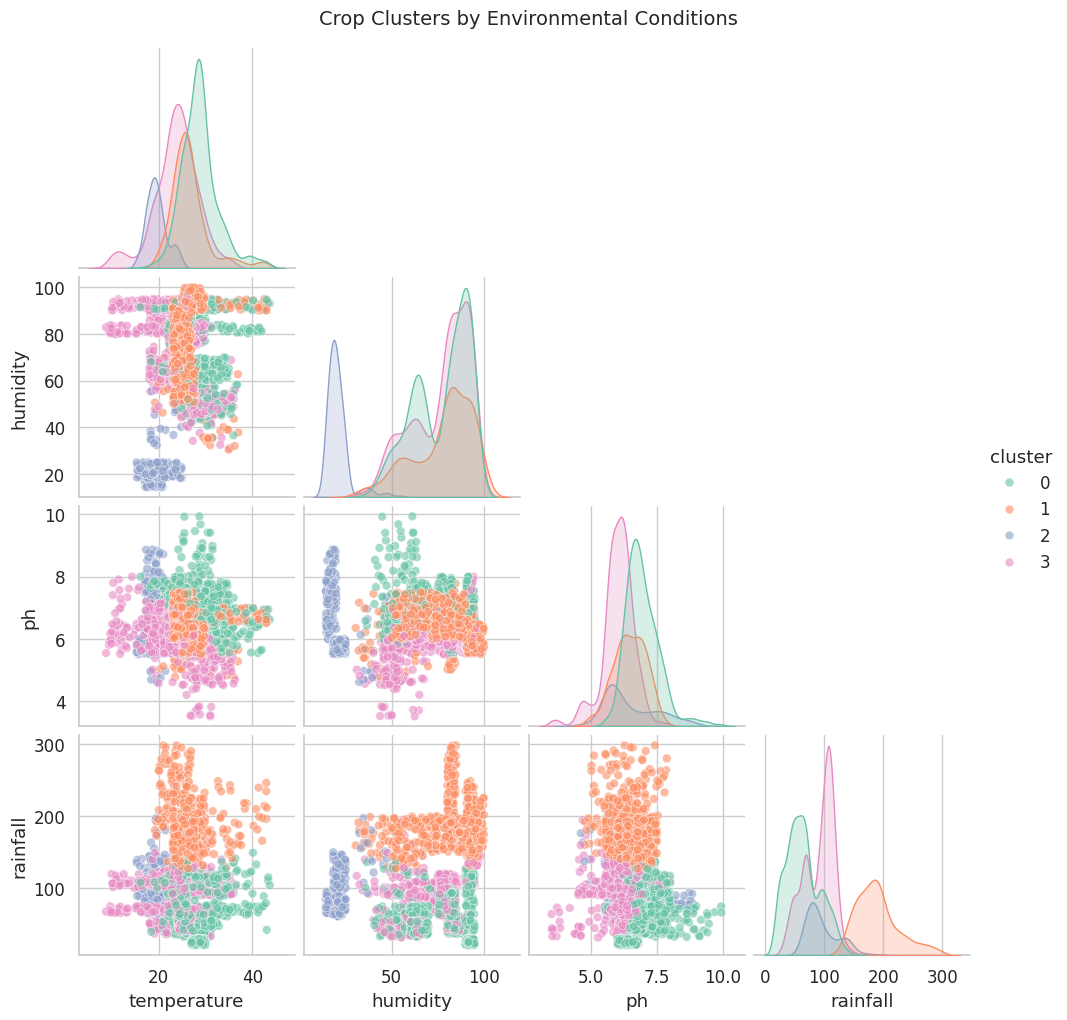

In [18]:
# ==============================
#  Crop Clustering with K-Means
# ==============================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Select features for clustering
features = ['temperature', 'humidity', 'ph', 'rainfall']
X = df[features]

# Step 2: Standardize the data (very important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Compute cluster means (to see which crops fall where)
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)

# Step 5: Assign the most frequent crop type to each cluster for interpretation
dominant_crops = df.groupby('cluster')['label'].agg(lambda x: x.value_counts().index[0])
print("\nDominant crop in each cluster:\n", dominant_crops)

# Step 6: Visualize clusters (pairplot)
sns.pairplot(
    df,
    vars=['temperature', 'humidity', 'ph', 'rainfall'],
    hue='cluster',
    palette='Set2',
    corner=True,
    plot_kws={'alpha':0.6, 's':40}
)
plt.suptitle('Crop Clusters by Environmental Conditions', y=1.02, fontsize=14)
plt.show()


OK， doesn’t show much separation between clusters,

# Craft heatmaps to show correlations between all numerical factors, helping to pinpoint interdependencies

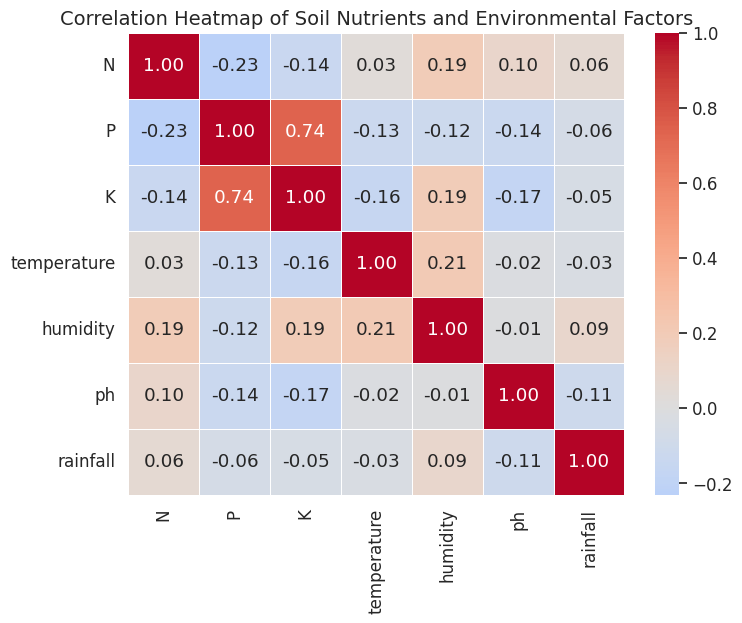

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Compute correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Soil Nutrients and Environmental Factors', fontsize=14)
plt.show()


Phosphorus (P) and Potassium (K) exhibit a moderately strong correlation (r ≈ 0.74), which likely reflects common fertilizer application practices rather than a direct chemical dependency.
While this suggests some redundancy, the correlation is not strong enough to justify feature removal. Both features were retained for subsequent analysis to preserve distinct soil nutrient information

# Execute ANOVA tests to examine whether means of different environmental factors (like humidity, temperature, and rainfall) are significantly different across various crop types.

In [21]:
from scipy.stats import f_oneway
import pandas as pd

#  Group the data by crop type
groups = df.groupby('label')

#  Define the environmental factors to test
factors = ['temperature', 'humidity', 'ph', 'rainfall']

# Create an empty dictionary to store the results
anova_results = {}

# Perform ANOVA for each environmental factor
for factor in factors:

    # 4.1 Create an empty list to hold samples for each crop
    samples = []

    # 4.2 Loop through each crop group and extract the factor values
    for crop_name, crop_data in groups:
        values = crop_data[factor].values   # all values of this factor for the current crop
        samples.append(values)              # add them to the list

    # 4.3 Perform one-way ANOVA across all crop types for this factor
    f_stat, p_value = f_oneway(*samples)

    # 4.4 Save the results for this factor
    anova_results[factor] = {
        'F-statistic': f_stat,
        'p-value': p_value
    }

# Convert results into a DataFrame for readability
anova_df = pd.DataFrame(anova_results).T
print("\n=== ANOVA Results ===")
print(anova_df)



=== ANOVA Results ===
             F-statistic        p-value
temperature   102.186981  4.019324e-305
humidity     3103.708891   0.000000e+00
ph             60.344034  6.493162e-199
rainfall      605.527966   0.000000e+00


The one-way ANOVA tests indicate that all four environmental factors (temperature, humidity, pH, and rainfall) vary significantly across crop types (p < 0.001 for all).
This suggests that different crops have distinct environmental requirements, confirming that these variables are meaningful predictors for crop classification and recommendation

# Use regression models to assess the influence of environmental and soil factors on crop yield and type.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1Define features (X) and target (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode crop types into numeric labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_scaled, y_train)

# Evaluate model performance
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9727272727272728

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

“The multinomial logistic regression model achieved an overall accuracy of 97%.
Precision, recall, and F1-scores were consistently high across all crop classes, indicating balanced performance.

# Interpret the p-values from your statistical tests to determine significance levels, and use this to draw conclusions about the factors that are most predictive of crop type

The ANOVA tests revealed that all environmental factors — temperature, humidity, pH, and rainfall — show highly significant differences across crop types (all p-values < 0.001).
This indicates that each factor plays a statistically meaningful role in distinguishing between crops.

However, when examining the scatter plots and descriptive patterns, we observed that no single crop type has an optimal range for all four factors simultaneously.
Each crop appears to have a distinct environmental profile — for example:

Some crops like watermelon and papaya tolerate a wide temperature range but have stricter humidity or rainfall requirements.

Others like apple or muskmelon are highly temperature-sensitive but grow only within narrow environmental limits.

Among the factors, humidity and rainfall displayed the highest F-statistics in the ANOVA results, meaning they explain most of the variation across crop types and are therefore the strongest predictors of crop differentiation.
Temperature also contributes meaningfully, while soil pH—though significant—shows relatively smaller differences, suggesting that most crops grow in near-neutral soil conditions.

In conclusion, all four environmental variables significantly influence crop type, but humidity and rainfall are the most predictive factors, followed by temperature, with pH being the least influential.